# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print("Alpaca Key Type:", type(alpaca_api_key))
print("Alpaca Secret Key Type:", type(alpaca_secret_key))

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")
type(alpaca)

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


alpaca_trade_api.rest.REST

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Set the tickers for crypto assets
crypto = ["BTC", "ETH"]

# Create the crypto assets DataFrame
crypto_df = {"crypto" : [my_btc, my_eth]}
crypto_df = pd.DataFrame(data=crypto_df, index=crypto)

# Display crypto assets
crypto_df

,crypto
BTC,1.2
ETH,5.3


In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
# Execute a get request for BTC
btc_response = requests.get(btc_url).json()
# Execute a get request for ETH
eth_response = requests.get(eth_url).json()

print(btc_response)
print(eth_response)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18522543, 'total_supply': 18522543, 'max_supply': 21000000, 'quotes': {'USD': {'price': 11894.83, 'volume_24h': 21282841806, 'market_cap': 220446427987, 'percentage_change_1h': 0.0980749512238463, 'percentage_change_24h': 1.31569100515092, 'percentage_change_7d': 3.04637525598933, 'percent_change_1h': 0.0980749512238463, 'percent_change_24h': 1.31569100515092, 'percent_change_7d': 3.04637525598933}, 'CAD': {'price': 15617.91179, 'volume_24h': 27944371291.278, 'market_cap': 289446159946.931, 'percent_change_1h': 0.0980749512238463, 'percent_change_24h': 1.31569100515092, 'percent_change_7d': 3.04637525598933}}, 'last_updated': 1603230304}}, 'metadata': {'timestamp': 1603230304, 'num_cryptocurrencies': 1430, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 113088920, 'total_

In [7]:
# Fetch current BTC price
btc_current_value = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_current_value = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_asset_value = my_btc * btc_current_value
eth_asset_value = my_eth * eth_current_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_asset_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_asset_value:0.2f}")

The current value of your 1.2 BTC is $14273.80
The current value of your 5.3 ETH is $1949.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

# Set the tickers
stock_tickers = ["AGG", "SPY"]

# Create the shares DataFrame
stock_shares_df = {"shares" : [my_agg, my_spy]}
stock_shares_df = pd.DataFrame(data=stock_shares_df, index=stock_tickers)
# Display shares data
stock_shares_df

,shares
AGG,200
SPY,50


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()

# Set the tickers
stock_tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stock_portfolio_df = alpaca.get_barset(stock_tickers, timeframe, start=today, end=today).df

# Preview DataFrame
stock_portfolio_df

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [10]:
# Pick AGG and SPY close prices
agg_close_price = stock_portfolio_df["AGG"]["close"][0]
spy_close_price = stock_portfolio_df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [11]:
# Compute the current value of shares
agg_value = (my_agg * agg_close_price)
spy_value = (my_spy * spy_close_price)

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")

The current value of your 200 AGG shares is $23576.00
The current value of your 50 SPY shares is $17362.50


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value = btc_asset_value + eth_asset_value
shares_value = agg_value + spy_value

names = ["crypto", "shares"]

savings_df = {"amount" : [crypto_value, shares_value]}
savings_df = pd.DataFrame(data=savings_df, index=names)

# Display savings DataFrame
display(savings_df)

,amount
crypto,16223.401
shares,40938.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E213181730>],
      dtype=object)

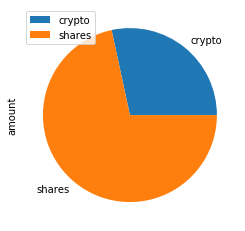

In [14]:
# Plot savings pie chart
savings_df.plot.pie(subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Calculate savings shortfall, if total savings are less than emergency fund needs
savings_shortfall = total_savings - emergency_fund

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached this financial goal.")
else:
    print(f"You need to save ${savings_shortfall:0.2f} to reach this financial goals ")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df = alpaca.get_barset(
    stock_tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
stock_data_df.head()

AGG                                       SPY  \
                             open     high     low   close   volume    open   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588  202.83   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244  202.98   

                                                                
                             high       low   close     volume  
2015-10-16 00:00:00-04:00  203.29  201.9200  203.14   79323870  
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [19]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012546,1.017056,1.001956,1.001675,0.996234,1.000719,1.015055,1.002938,1.010262,1.007873,...,0.994144,1.002493,0.987611,1.007930,1.002274,0.991027,1.003266,0.991969,0.995458,1.001482
2,1.016579,1.022689,1.002516,1.012354,0.989849,1.001357,1.016826,1.003313,1.022052,1.000879,...,1.000731,1.003745,1.006719,1.019479,0.999642,0.990719,0.995698,1.001137,1.002735,1.006432
3,1.020317,1.020825,0.997966,1.009483,0.983066,1.004276,1.025658,1.001275,1.011457,0.999608,...,1.005950,1.000657,1.005891,1.019866,0.998722,0.975267,1.001173,0.998481,0.989904,1.003440
4,1.016500,1.013922,1.000978,1.017529,0.988506,1.001910,1.029960,0.994741,0.995591,1.005045,...,1.002667,0.991485,1.005738,1.017383,1.003742,0.980351,0.997644,1.008999,0.981928,1.002661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.044677,23.449924,11.597357,7.865272,4.948745,4.907995,7.192121,5.442456,6.278745,11.059149,...,10.265402,4.173544,15.888891,8.410625,15.720613,3.937984,18.484095,14.215702,12.340681,5.148024
7557,12.903017,23.503803,11.462491,7.901651,4.988449,4.945757,7.221943,5.518386,6.200541,10.973340,...,10.227216,4.160809,15.923320,8.357084,15.670272,3.937276,18.498465,14.149422,12.354977,5.153406
7558,13.014090,23.266370,11.481874,8.024514,4.923881,5.004358,7.215597,5.480418,6.218310,10.993212,...,10.175587,4.123246,15.949744,8.357726,15.718054,3.939086,18.322574,13.971597,12.377092,5.158510
7559,12.953678,23.252555,11.542801,8.021667,4.951227,4.989780,7.273635,5.420324,6.208702,10.824987,...,10.077022,4.083098,16.068339,8.410541,15.713002,3.961061,18.194897,13.943099,12.490829,5.163374


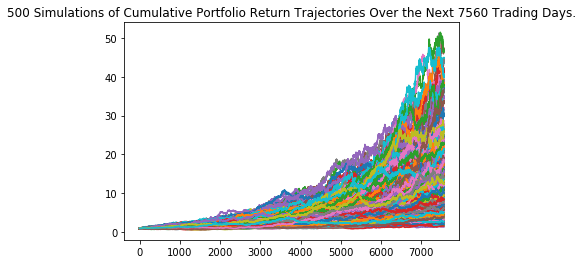

In [21]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

#Save the plot for future use
line_plot.get_figure().savefig("MC_thirtyyear_line_plot.png", bbox_inches="tight")

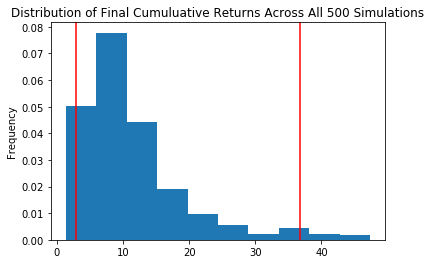

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

#Save the plot for future use
dist_plot.get_figure().savefig("MC_thirtyyear_dist_plot.png", bbox_inches="tight")

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
combined_tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(combined_tbl)

count           500.000000
mean             11.350883
std               8.085879
min               1.342615
25%               6.159132
50%               8.948623
75%              13.686716
max              47.363820
95% CI Lower      2.838331
95% CI Upper     36.731243
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_combined = round(combined_tbl[8]*initial_investment,2)
ci_upper_combined = round(combined_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_combined} and ${ci_upper_combined}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56766.62 and $734624.85


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
revised_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_revised_combined = round(combined_tbl[8]*revised_initial_investment,2)
ci_upper_revised_combined = round(combined_tbl[9]*revised_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${revised_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_revised_combined} and ${ci_upper_revised_combined}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $85149.93 and $1101937.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyear.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004607,1.009361,1.008113,0.984475,1.013635,0.977753,0.978377,0.997705,1.004010,1.008727,...,0.977599,0.991042,0.996740,0.997845,0.996509,1.004587,1.010158,1.005284,0.989117,1.009098
2,1.006509,1.018259,1.018981,0.998595,1.009162,0.970315,0.989423,1.000404,0.995451,1.022032,...,0.988760,0.988401,0.984295,1.002247,1.000698,1.017844,0.991349,1.010088,0.987864,1.005412
3,1.012439,1.008770,1.020825,1.001855,1.003707,0.964172,0.985970,0.998025,0.981418,1.007873,...,0.995113,0.983384,0.978226,0.998384,1.008024,1.029992,0.996200,1.016512,0.992834,1.006480
4,1.022750,1.006228,1.025203,1.007773,1.019722,0.967289,0.981022,1.003432,0.997084,1.004016,...,0.990993,1.002377,0.970923,0.997233,1.005402,1.028671,0.995311,1.023883,1.013068,1.010056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.274333,1.940950,1.656152,1.377839,3.304254,3.234308,2.623700,2.581934,0.944627,1.361829,...,1.066217,1.366194,1.017232,0.862068,2.206142,1.185117,1.441250,1.501602,1.476185,1.818431
1257,1.275606,1.931034,1.637863,1.375966,3.340424,3.148792,2.592309,2.599301,0.950275,1.349558,...,1.056926,1.359210,1.020422,0.852863,2.187224,1.171511,1.425097,1.511357,1.492152,1.805710
1258,1.276586,1.940343,1.615237,1.371010,3.366986,3.149985,2.588585,2.618272,0.948154,1.346127,...,1.071965,1.363183,1.017858,0.851840,2.166860,1.162679,1.428837,1.500995,1.514762,1.801984
1259,1.299377,1.930520,1.634888,1.382115,3.343395,3.114829,2.574262,2.649237,0.959366,1.359606,...,1.078687,1.373284,1.031411,0.852195,2.192856,1.152652,1.427402,1.521500,1.507605,1.813101


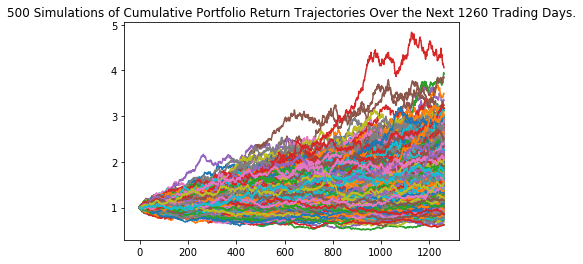

In [28]:
# Plot simulation outcomes
five_year_line_plot = MC_fiveyear.plot_simulation()

#Save the plot for future use
five_year_line_plot.get_figure().savefig("MC_fiveyear_line_plot.png", bbox_inches="tight")

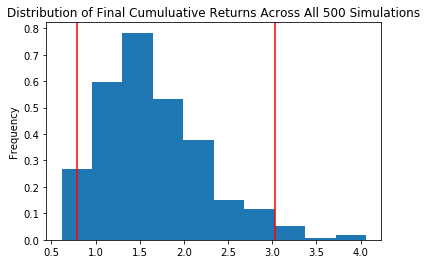

In [29]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = MC_fiveyear.plot_distribution()

#Save the plot for future use
five_year_dist_plot.get_figure().savefig("MC_fiveyear_dist_plot.png", bbox_inches="tight")

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.650753
std               0.582285
min               0.614336
25%               1.245488
50%               1.563213
75%               1.990698
max               4.061206
95% CI Lower      0.794223
95% CI Upper      3.036316
Name: 1260, dtype: float64


In [31]:
# Set initial investment
my_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_year = round(five_year_tbl[8]*my_initial_investment,2)
ci_upper_five_year = round(five_year_tbl[9]*my_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${my_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_year} and ${ci_upper_five_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47653.36 and $182178.98


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyear.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981104,1.003282,1.013763,1.000369,1.006756,1.006621,0.994953,1.002709,1.000549,1.005275,...,1.002882,1.005267,1.004508,1.001111,1.001378,1.011320,1.005797,0.991176,1.010319,1.004939
2,0.987042,1.024665,1.010349,1.002591,1.004000,1.009998,0.996023,0.997654,0.995723,1.008275,...,1.011578,1.000161,1.021083,0.999375,1.005068,1.000835,1.003475,1.008609,0.998235,1.001892
3,0.966703,1.031855,1.006724,1.005697,1.015038,1.017276,1.006124,1.007149,0.985932,1.016328,...,1.013195,0.981840,1.020899,0.980966,1.003227,1.014057,1.003618,0.995779,0.995662,0.998015
4,0.977865,1.019448,1.017345,1.006932,1.004864,1.031423,0.984478,1.000906,0.976409,1.012956,...,1.006029,0.977892,1.031264,0.989817,1.009005,1.017354,1.021442,0.991735,0.993037,0.989737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.538254,3.321572,2.056825,1.750115,1.010550,3.361853,4.074319,0.984521,2.731997,1.439657,...,2.046860,2.153750,2.254345,2.954178,2.366817,1.550131,2.217989,2.493208,2.806356,2.034057
2517,3.554727,3.302156,2.043419,1.761224,1.012845,3.391313,4.128324,0.993293,2.716384,1.454505,...,2.067226,2.172167,2.239975,2.883272,2.357076,1.559740,2.224227,2.479294,2.763020,2.027484
2518,3.600470,3.261432,2.064253,1.750194,1.009032,3.426657,4.184801,0.978852,2.710132,1.423977,...,2.055375,2.172682,2.228972,2.839024,2.394669,1.556920,2.226665,2.462355,2.729959,2.062897
2519,3.580597,3.281848,2.079874,1.745112,1.022998,3.385278,4.135788,0.972819,2.687931,1.425107,...,2.047036,2.211164,2.236380,2.866487,2.385966,1.561115,2.224161,2.482730,2.731529,2.061781


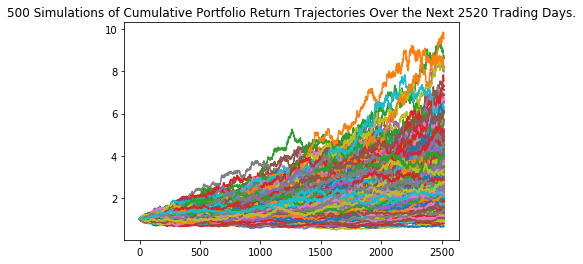

In [34]:
# Plot simulation outcomes
ten_year_line_plot = MC_tenyear.plot_simulation()

#Save the plot for future use
ten_year_line_plot.get_figure().savefig("MC_tenyear_line_plot.png", bbox_inches="tight")

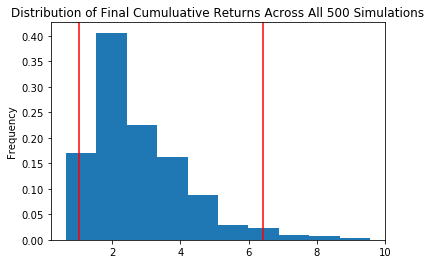

In [35]:
# Plot probability distribution and confidence intervals
ten_year_dist_plot = MC_tenyear.plot_distribution()

#Save the plot for future use
ten_year_dist_plot.get_figure().savefig("MC_tenyear_dist_plot.png", bbox_inches="tight")

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.775128
std               1.397957
min               0.647147
25%               1.814038
50%               2.396634
75%               3.468821
max               9.559381
95% CI Lower      1.019809
95% CI Upper      6.417711
Name: 2520, dtype: float64


In [37]:
# Set initial investment
my_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_year = round(ten_year_tbl[8]*my_initial_investment,2)
ci_upper_ten_year = round(ten_year_tbl[9]*my_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_year} and ${ci_upper_ten_year}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $61188.55 and $385062.65
